Copyright **`(c)`** 2023 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# LAB9

Write a local-search algorithm (eg. an EA) able to solve the *Problem* instances 1, 2, 5, and 10 on a 1000-loci genomes, using a minimum number of fitness calls. That's all.

### Deadlines:

* Submission: Sunday, December 3 ([CET](https://www.timeanddate.com/time/zones/cet))
* Reviews: Sunday, December 10 ([CET](https://www.timeanddate.com/time/zones/cet))

Notes:

* Reviews will be assigned  on Monday, December 4
* You need to commit in order to be selected as a reviewer (ie. better to commit an empty work than not to commit)

In [8]:
from random import choices
from random import random, choice, randint
from dataclasses import dataclass
from copy import copy
import matplotlib.pyplot as plt
from pprint import pprint

import numpy as np

import math

import lab9_lib

## BEST PARAMETERS for Problem 1:
-POPULATION_SIZE: 100

-TOURNAMENT_SIZE = 2

-MUTATION_PROBABILITY = 0.01

-MIGRATION_PROBABILITY=0.01

-LOCI=1000

-num_islands=POPULATION_SIZE//10

-ISLAND_SIZE=POPULATION_SIZE//num_islands

-OFFSPRING_SIZE =ISLAND_SIZE//4


In [9]:
PROBLEM_SIZE = 5
LOCI = 1000
POPULATION_SIZE = 30
OFFSPRING_SIZE = 20
TOURNAMENT_SIZE = 2
MUTATION_PROBABILITY = 0.15
GENERATIONS = 5000

is_removing=True

In [10]:

@dataclass
class Individual:
   
    fitness: float
    genotype: list[int]


    def __init__(self, fitness, genotype=None):
        if genotype is None:
            #genotype = list(choices([0, 1], k=LOCI))
            genotype=[choice((0, 1)) for _ in range(LOCI)]
        object.__setattr__(self, "_genotype", genotype)
        object.__setattr__(self, "_fitness", fitness(self.genotype))


    @property
    def genotype(self):
        return self._genotype

    @property
    def fitness(self):
        return self._fitness
      
    def __eq__(self, other):
        if isinstance(other, Individual):
            return self._genotype == other._genotype
        return False

    def __hash__(self):
        # Using hash() on a tuple of hashable attributes
        return hash(tuple(self._genotype))

def select_parent(pop):
    pool = [choice(pop) for _ in range(TOURNAMENT_SIZE)]
    champion = max(pool, key=lambda i: i.fitness)
    return champion
    
def bit_flip_mutate(ind: Individual, fitness) -> Individual:
    """ bit-flip mutation """
    l=len(ind.genotype)
    
    p=MUTATION_PROBABILITY
    
    for i in range(l):
        if p>= np.random.normal():
            ind.genotype[i]=1-ind.genotype[i]
    
    return Individual(fitness, ind.genotype)

def mutate(ind: Individual,fitness) -> Individual:
    genotype=list(ind.genotype)
    index = randint(0, LOCI - 1)
    genotype[index] = 1 - genotype[index]
    return Individual(fitness=fitness, genotype=list(genotype))

def one_cut_xover(ind1: Individual, ind2: Individual, fitness) -> Individual:
    index = randint(0, LOCI - 1)
    offspring1 = Individual(fitness=fitness, genotype=list(ind1.genotype[:index]) + list(ind2.genotype[index:]))
    offspring2 = Individual(fitness=fitness, genotype=list(ind1.genotype[index:]) + list(ind2.genotype[:index]))
    #offspring2 = Individual(fitness=fitness, genotype=list(ind2.genotype[:index]) + list(ind1.genotype[index:]))

    return offspring1,offspring2

def two_cut_xover(ind1: Individual, ind2: Individual,fitness) -> Individual:
    cut_point_1= randint(0, LOCI-1)
    cut_point_2= randint(0, LOCI-1)

    if cut_point_1>cut_point_2:
        cut_point_1,cut_point_2=cut_point_2,cut_point_1

    if cut_point_1 != cut_point_2:
        ind1.genotype[cut_point_1::cut_point_2],ind2.genotype[cut_point_1::cut_point_2]=ind2.genotype[cut_point_1::cut_point_2],ind1.genotype[cut_point_1::cut_point_2]

    return Individual(fitness=fitness,genotype= list(ind1.genotype)),Individual(fitness=fitness,genotype= list(ind2.genotype))

def uniform_cut_xover(ind1: Individual, ind2: Individual,fitness) -> Individual:

    l=len(ind1.genotype)
    p=1/l
   
    for i in range(l):
    
        if p >=np.random.normal():
            j=-l+i
            ind1.genotype[i],ind2.genotype[i]=ind2.genotype[i],ind1.genotype[i]
        
        
    #print("child1", ind1.genotype)

    return Individual(fitness=fitness,genotype= list(ind1.genotype)),Individual(fitness=fitness,genotype= list(ind2.genotype))



In [11]:
def generation(population,crossover,fitness, mutation):
    
    offspring = list()

    for i in range(OFFSPRING_SIZE):
        if random() < MUTATION_PROBABILITY:  # self-adapt mutation probability
            p = select_parent(population)
            o = mutation(p, fitness)
            offspring.append(o)
        else:
            # xover 
            p1 = select_parent(population)
            p2 = select_parent(population)
            if crossover==one_cut_xover:
                o1,o2= one_cut_xover(p1, p2, fitness)
    
            elif crossover==two_cut_xover:
                o1,o2=two_cut_xover(p1,p2,fitness)
            else:
                o1,o2=uniform_cut_xover(p1,p2,fitness)
            if random() < MUTATION_PROBABILITY:  # self-adapt mutation probability
                o1 = mutate(o1, fitness)
                o2 = mutate(o2, fitness)
            
            offspring.append(o1)
            offspring.append(o2)
           
            i+=2
            

    #----------------remove previous duplicates------------
    if is_removing:
        population = list(set(population))    
    population.extend(offspring)
 
    
    population.sort(key=lambda i: i.fitness, reverse=True)
   
    population=population[:POPULATION_SIZE]
    #print("after population len", len(population))
    best_fitness=population[0].fitness

    return best_fitness,population


## GA

iteration 0 fitness 0.539 calls 72
iteration 10 fitness 0.591 calls 502
iteration 20 fitness 0.655 calls 916
iteration 30 fitness 0.71 calls 1319
iteration 40 fitness 0.749 calls 1719
iteration 50 fitness 0.798 calls 2118
iteration 60 fitness 0.844 calls 2520
iteration 70 fitness 0.891 calls 2929
iteration 80 fitness 0.911 calls 3331
iteration 90 fitness 0.942 calls 3741
iteration 100 fitness 0.959 calls 4146
iteration 110 fitness 0.985 calls 4546


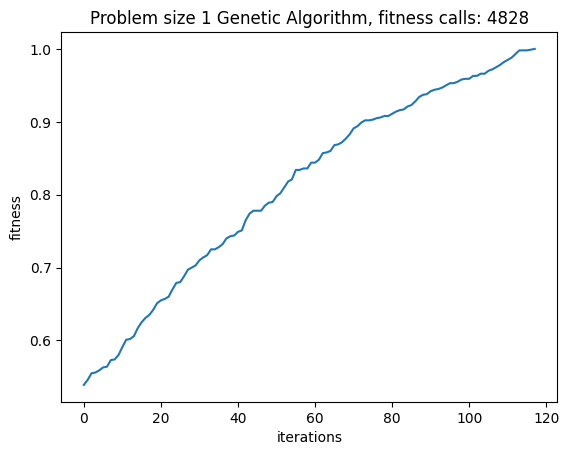

calls 4828
iteration 0 fitness 0.524 calls 69
iteration 10 fitness 0.536 calls 468
iteration 20 fitness 0.538 calls 871
iteration 30 fitness 0.54 calls 1281
iteration 40 fitness 0.55 calls 1681
iteration 50 fitness 0.564 calls 2086
iteration 60 fitness 0.572 calls 2490
iteration 70 fitness 0.598 calls 2888
iteration 80 fitness 0.61 calls 3288
iteration 90 fitness 0.62 calls 3682
iteration 100 fitness 0.63 calls 4084
iteration 110 fitness 0.642 calls 4494
iteration 120 fitness 0.65 calls 4904
iteration 130 fitness 0.662 calls 5308
iteration 140 fitness 0.666 calls 5714
iteration 150 fitness 0.688 calls 6112
iteration 160 fitness 0.688 calls 6521
iteration 170 fitness 0.712 calls 6924
iteration 180 fitness 0.722 calls 7328
iteration 190 fitness 0.734 calls 7727
iteration 200 fitness 0.754 calls 8130
iteration 210 fitness 0.784 calls 8531
iteration 220 fitness 0.784 calls 8938
iteration 230 fitness 0.8 calls 9345
iteration 240 fitness 0.806 calls 9751
iteration 250 fitness 0.822 calls 101

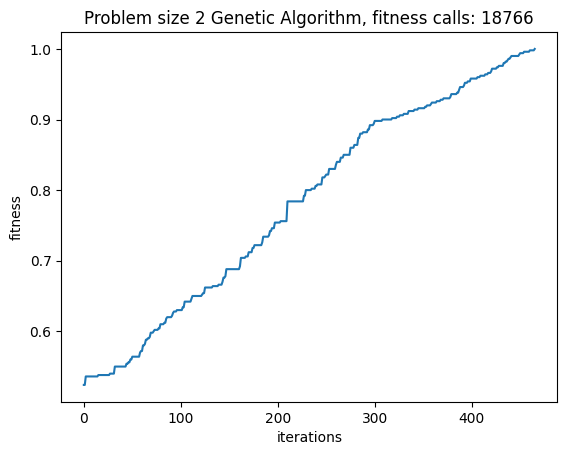

calls 18766


In [12]:

def ga(problem_size):
    
    global MUTATION_PROBABILITY 
    fitness_func = lab9_lib.make_problem(problem_size)

    population = [
        Individual(fitness_func)
        for _ in range(POPULATION_SIZE)
    ]
    """ 
    best_fitnesses=[]
    it=0
    for _ in range(5000):
        it+=1
        offspring = list()

        for j in range(OFFSPRING_SIZE):
            if random() < MUTATION_PROBABILITY:  # self-adapt mutation probability
                p = select_parent(population)
                o = mutate(p)
                offspring.append(o)
            else:
                # xover 
                p1 = select_parent(population)
                p2 = select_parent(population)
                #if crossover==one_cut_xover:
                o1,o2= one_cut_xover(p1, p2)
                offspring.append(o1)
                offspring.append(o2)
                j+=2
        
        population.extend(offspring)

        population.sort(key=lambda i: i.fitness, reverse=True)
    
        population=population[:POPULATION_SIZE]
        new_fitness=population[0].fitness
        print(new_fitness)
        best_fitnesses.append(new_fitness)
        if new_fitness==1.0:
            break;

    plt.plot( range(0,it), best_fitnesses)
    plt.title("Genetic Algorithm, calls: "+ str(fitness_func.calls))
    plt.xlabel("iterations")
    plt.ylabel("fitness") 

    print(fitness_func.calls) """


    best_fitnesses=[]
    num_iterations=50000
    it=0
    new_fitness=0
    increasing=0
    decreasing=0

    for i in range(num_iterations):
        last_fitness=new_fitness
        it=i+1
        new_fitness, population= generation(population, one_cut_xover, fitness_func, bit_flip_mutate)
        best_fitnesses.append(new_fitness)
        if i%10==0:
           print("iteration",i, "fitness",new_fitness,"calls",fitness_func.calls)
        if new_fitness > last_fitness:
            increasing+=1
            if increasing>10 and MUTATION_PROBABILITY>0.01:
                increasing=0
                MUTATION_PROBABILITY*=0.8
        else:
            decreasing+=1
            if decreasing>10 and MUTATION_PROBABILITY<0.3:
                decreasing=0
                MUTATION_PROBABILITY*=1.05
                

        if new_fitness==1.0:
            break;

    plt.plot( range(0,it), best_fitnesses)
    plt.title("Problem size "+ str(problem_size) + " Genetic Algorithm, fitness calls: "+ str(fitness_func.calls))
    plt.xlabel("iterations")
    plt.ylabel("fitness") 
    plt.show()
    print("calls",fitness_func.calls) 

#-------------solve the problems 1 and 2 with a ga without islands------------------
ga(1)
ga(2)

## ISLANDS MODEL

In [13]:
ALL_POPULATION_SIZE = 500
TOURNAMENT_SIZE = 2
MUTATION_PROBABILITY = 0.01
MIGRATION_PROBABILITY=0.01
LOCI=1000
num_islands=5
POPULATION_SIZE=ALL_POPULATION_SIZE//num_islands
OFFSPRING_SIZE =POPULATION_SIZE//3
is_removing=True
print(POPULATION_SIZE) 

100


In [ ]:
fitness_function=lab9_lib.make_problem(5)


@dataclass
class Island:
    population: list[Individual]
    crossover: callable


def migration(islands):
    #print(len(islands[0].population))
    migrants=[]
    num_migrants=10
    for i in range(len(islands)):
        for _ in range(num_migrants):
         
            if random()<0.5:
                migrant=max(islands[i].population, key=lambda x: x.fitness)
            else:
                migrant=choice(islands[i].population)
      
            islands[i].population.remove(migrant)
     
            migrants.append(migrant)

    for i in range (len(islands)):
        for j in range(len(migrants)):
            if i==0:
                islands[i].population.append(migrants[len(migrants)-j-1])
            else:
                islands[i].population.append(migrants[i*num_migrants-j-1])
                
    return islands



population = [
    Individual(fitness_function)
    for _ in range(ALL_POPULATION_SIZE)
]

islands=[]
# Create the islands with similar individual
population.sort(key=lambda i: i.fitness)
   
j=0
for i in range(0, len(population), POPULATION_SIZE):
    j+=1
    sublist = population[i:i + POPULATION_SIZE]
    prob= random()
    if prob<0.7:
        islands.append(Island(population=sublist, crossover=one_cut_xover))
   
    else:
        islands.append(Island(population=sublist, crossover=one_cut_xover))


best_fitnesses=[0 for _ in range(num_islands)]
max_fitness=0
max_fitnesses=[]
it=0
same=0
last_fitness=0
increasing=0
decreasing=0

#while max_fitness!=1.0:
for i in range(30000):   
    
    last_fitness=max_fitness

    for j in range(len(islands)):
        
        best_fitnesses[j],islands[j].population = generation(islands[j].population,islands[j].crossover, fitness_function,bit_flip_mutate)
        
    max_fitness=max(best_fitnesses)
    max_fitnesses.append(max_fitness)
    
    if i%10==0:
        print("iteration", i, "best ",  max_fitness)
        print("MUTATION",MUTATION_PROBABILITY)
        print("calls",fitness_function.calls)
        #print("MIGRATION", MIGRATION_PROBABILITY)

    if random()<MIGRATION_PROBABILITY:
        islands=migration(islands)
       
   
    if max_fitness > last_fitness:
        increasing+=1
        if increasing>30 and MUTATION_PROBABILITY>0.01:
            increasing=0
            MUTATION_PROBABILITY*=0.9
            MIGRATION_PROBABILITY*=0.9
    else:
        decreasing+=1
        if decreasing>20 and MUTATION_PROBABILITY<0.3:
            decreasing=0
            MUTATION_PROBABILITY*=1.05
            MIGRATION_PROBABILITY*=1.05

    if MUTATION_PROBABILITY>0.3:
        MUTATION_PROBABILITY*=0.7
        MIGRATION_PROBABILITY*=0.7
    
    it=i+1
    if max_fitness==1.0:
        break;
    #print(len(islands[0].population))
plt.plot( range(0,it), max_fitnesses)
plt.title("Problem 5 Island model, fitness calls: "+ str(fitness_function.calls))
plt.xlabel("iterations")
plt.ylabel("fitness") 
print("calls",fitness_function.calls) 